In [1]:
!pip install rouge

## Calculate metrics

In [1]:
from rouge import Rouge
from nltk.translate import meteor_score
from torchtext.data.metrics import bleu_score

In [2]:
def calc_rouge(preds, tgts):
    rouge = Rouge()
    s = rouge.get_scores(preds, tgts, avg=True)
    return s['rouge-l']['f']

def calc_meteor(preds, tgts):
    meteor = 0
    for i in range(len(preds)):
        meteor += meteor_score.meteor_score(tgts[i], preds[i])
    meteor /= len(preds)
    return meteor

def calc_bleu(preds, tgts):
    splitpreds = [pred.split() for pred in preds]
    splittargets = [[target.split()] for target in tgts]
    return bleu_score(splitpreds, splittargets)

def full_eval(preds, tgts):
    result = {
        'BLEU-4': calc_bleu(preds, tgts),
        'ROUGE-L': calc_rouge(preds, tgts)
#         'METEOR': calc_meteor(preds, tgts),
    }
    return result

In [3]:
with open('chenresults/wq_test_G2S_ae_pred.txt', 'r', encoding='utf-8') as f:
    chenWQpreds = f.read().splitlines()
with open('chenresults/wq_test_gold.txt', 'r', encoding='utf-8') as f:
    chenWQtgts = f.read().splitlines()
    
with open('test_results/PQbart/predictions.txt', 'r', encoding='utf-8') as f:
    bartPQpreds = f.read().splitlines()
with open('test_results/PQbart/targets.txt', 'r', encoding='utf-8') as f:
    bartPQtgts = f.read().splitlines()
    
with open('test_results/WQbart/predictions.txt', 'r', encoding='utf-8') as f:
    bartWQpreds = f.read().splitlines()
with open('test_results/WQbart/targets.txt', 'r', encoding='utf-8') as f:
    bartWQtgts = f.read().splitlines()

with open('test_results/PQt5/predictions.txt', 'r', encoding='utf-8') as f:
    t5PQpreds = f.read().splitlines()
with open('test_results/PQt5/targets.txt', 'r', encoding='utf-8') as f:
    t5PQtgts = f.read().splitlines()
    
with open('test_results/WQt5/predictions.txt', 'r', encoding='utf-8') as f:
    t5WQpreds = f.read().splitlines()
with open('test_results/WQt5/targets.txt', 'r', encoding='utf-8') as f:
    t5WQtgts = f.read().splitlines()
    
with open('data/PQ/src_a_test.txt', 'r', encoding='utf-8') as f:
    PQsrc = f.read().splitlines()
    
with open('data/WQ/src_a_test.txt', 'r', encoding='utf-8') as f:
    WQsrc = f.read().splitlines()

In [5]:
print('\n Results Chen WQ:')
print(full_eval(chenWQpreds, chenWQtgts))

print('\n Results BART WQ:')
print(full_eval(bartWQpreds, bartWQtgts))

print('\n Results T5 WQ:')
print(full_eval(t5WQpreds, t5WQtgts))

print('\n Results BART PQ:')
print(full_eval(bartPQpreds, bartPQtgts))

print('\n Results T5 PQ:')
print(full_eval(t5PQpreds, t5PQtgts))


 Results Chen WQ:
{'BLEU-4': 0.2944504774226254, 'ROUGE-L': 0.5810563134422951}

 Results BART WQ:
{'BLEU-4': 0.23655793235229003, 'ROUGE-L': 0.4774000257545963}

 Results T5 WQ:
{'BLEU-4': 0.2358360527059752, 'ROUGE-L': 0.4785845448219537}

 Results BART PQ:
{'BLEU-4': 0.5198486655390564, 'ROUGE-L': 0.7043701338843814}

 Results T5 PQ:
{'BLEU-4': 0.5222811102867126, 'ROUGE-L': 0.7279342503628466}


##### Results for exclusion of answer nodes

In [6]:
with open('test_results/PQbart_NO/predictions.txt', 'r', encoding='utf-8') as f:
    bartPQpreds_NO = f.read().splitlines()
with open('test_results/PQbart_NO/targets.txt', 'r', encoding='utf-8') as f:
    bartPQtgts_NO = f.read().splitlines()
    
with open('test_results/WQbart_NO/predictions.txt', 'r', encoding='utf-8') as f:
    bartWQpreds_NO = f.read().splitlines()
with open('test_results/WQbart_NO/targets.txt', 'r', encoding='utf-8') as f:
    bartWQtgts_NO = f.read().splitlines()

with open('test_results/PQt5_NO/predictions.txt', 'r', encoding='utf-8') as f:
    t5PQpreds_NO = f.read().splitlines()
with open('test_results/PQt5_NO/targets.txt', 'r', encoding='utf-8') as f:
    t5PQtgts_NO = f.read().splitlines()
    
with open('test_results/WQt5_NO/predictions.txt', 'r', encoding='utf-8') as f:
    t5WQpreds_NO = f.read().splitlines()
with open('test_results/WQt5_NO/targets.txt', 'r', encoding='utf-8') as f:
    t5WQtgts_NO = f.read().splitlines()

In [8]:
print('\n Results BART WQ no answer nodes:')
print(full_eval(bartWQpreds_NO, bartWQtgts_NO))

print('\n Results T5 WQ no answer nodes:')
print(full_eval(t5WQpreds_NO, t5WQtgts_NO))

print('\n Results BART PQ no answer nodes:')
print(full_eval(bartPQpreds_NO, bartPQtgts_NO))

print('\n Results T5 PQ no answer nodes:')
print(full_eval(t5PQpreds_NO, t5PQtgts_NO))


 Results BART WQ no answer nodes:
{'BLEU-4': 0.23616770780296034, 'ROUGE-L': 0.47571782041669913}

 Results T5 WQ no answer nodes:
{'BLEU-4': 0.24174434023770403, 'ROUGE-L': 0.4782670980158225}

 Results BART PQ no answer nodes:
{'BLEU-4': 0.5199008519335445, 'ROUGE-L': 0.7058317634969794}

 Results T5 PQ no answer nodes:
{'BLEU-4': 0.5366665124893188, 'ROUGE-L': 0.7290599529677134}


In [118]:
calc_bleu([t5WQpreds_NO[47]], [t5WQtgts_NO[47]])

0.5464463233947754

In [117]:
calc_bleu([t5WQpreds[47]], [t5WQtgts[47]])

0.488101065158844

In [116]:
print([t5WQpreds[47]], [t5WQtgts[47]])

["what type of music did ludwig van beethoven and the film  in the shadow of the stars '' take place?"] ["what type of ludwig van beethoven music was featured in the film  in the shadow of the stars ''?"]


## Analysis of effect question length on performance

In [56]:
import re
import pandas as pd
from scipy.stats.mstats import gmean


def get_elements(graph):
    elements = re.split(r'<[A H R T]> ', graph)[1:]
    return [e.strip() for e in elements]

def triples_per_graph(dataset):
    l = []
    for graph in dataset:
        l.append(int((len(get_elements(graph))-1)/3))
    return l

def get_bleu_scores(preds,tgts):
    bleu_scores = []
    for pred, tgt in zip(preds,tgts):
        bleu_scores.append(calc_bleu([pred], [tgt]))
    return bleu_scores

def get_rouge_scores(preds,tgts):
    rouge_scores = []
    for pred, tgt in zip(preds,tgts):
        rouge_scores.append(calc_rouge([pred], [tgt]))
    return rouge_scores

In [47]:
graphslens1 = triples_per_graph(WQsrc)
bleus1 = get_bleu_scores(bartWQpreds, bartWQtgts)
df1 = pd.DataFrame({"bleu_scores": bleus1, "number_of_triples": graphslens1})

graphslens2 = triples_per_graph(WQsrc)
bleus2 = get_bleu_scores(t5WQpreds, t5WQtgts)
df2 = pd.DataFrame({"bleu_scores": bleus2, "number_of_triples": graphslens2})


grouped1 =  df1.groupby(["number_of_triples"]).mean()
grouped2 =  df2.groupby(["number_of_triples"]).mean()

grouped1['model'] = "BART"
grouped2['model'] = "T5"

df = grouped1.append(grouped2)

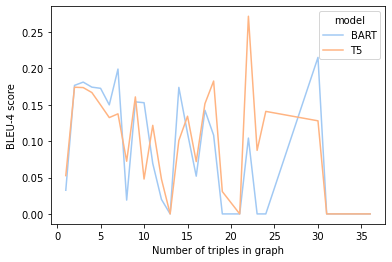

In [48]:
import seaborn as sns
fig = sns.lineplot(data=df, x='number_of_triples', y='bleu_scores', hue='model', palette='pastel');
fig.set(xlabel='Number of triples in graph', ylabel='BLEU-4 score')
fig.figure.savefig('graphsize.png', format='png', dpi=1200)

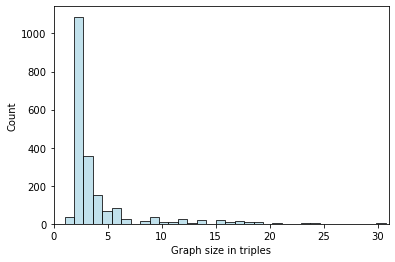

In [36]:
fig = sns.histplot(graphslens1, bins=40, color='lightblue');
fig.set(xlabel='Graph size in triples')
fig.set(xlim=(0, 31))
fig.figure.savefig('graphdist.png', format='png', dpi=1200)

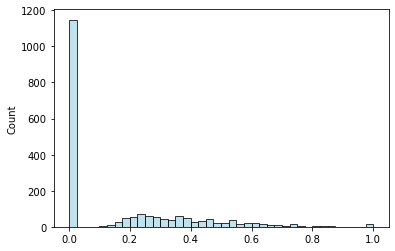

In [37]:
sns.histplot(bleus1, bins=40, color='lightblue');


## Question Length and performance

In [52]:
tgtlens = [len(e.split()) for e in t5WQtgts]

In [95]:
ddf1 = pd.DataFrame({"bleu_scores": bleus1, "question_length": tgtlens})
ddf2 = pd.DataFrame({"bleu_scores": bleus2, "question_length": tgtlens})
ddf1 = ddf1[ddf1.question_length < 26]
ddf2 = ddf2[ddf2.question_length < 26]

ggrouped1 =  ddf1.groupby(["question_length"]).mean()
ggrouped2 =  ddf2.groupby(["question_length"]).mean()

ggrouped1['model'] = "BART"
ggrouped2['model'] = "T5"

ddf = ggrouped1.append(ggrouped2)

In [99]:
print(t5WQtgts[3])
print(t5WQpreds[3])

what nation was led by the person who was appointed to their position by paul von hindebburg?
what country did the politician appointed by paul von hindenburg rule?


In [96]:
ddf1.head()

,bleu_scores,question_length
0,0.274282,20
1,0.159343,17
2,0.000000,13
3,0.000000,17
4,0.265082,18


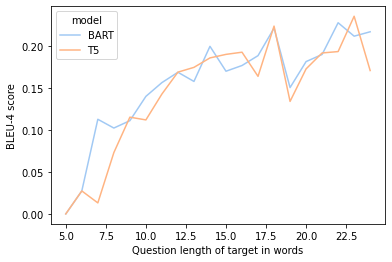

In [55]:
fig = sns.lineplot(data=ddf, x='question_length', y='bleu_scores', hue='model', palette='pastel');
fig.set(xlabel='Question length of target in words', ylabel='BLEU-4 score')
fig.figure.savefig('graphqlens.png', format='png', dpi=1200)

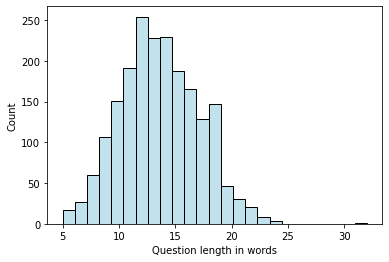

In [15]:
fig = sns.histplot(tgtlens, bins=25, color='lightblue');
fig.set(xlabel='Question length in words')
fig.figure.savefig('tgtlens.png', format='png', dpi=1200)

In [66]:
rouges1 = get_bleu_scores(bartWQpreds, bartWQtgts)
rouges2 = get_bleu_scores(t5WQpreds, t5WQtgts)

In [67]:
ddf1 = pd.DataFrame({"rouge_scores": rouges1, "question_length": tgtlens})
ddf2 = pd.DataFrame({"rouge_scores": rouges2, "question_length": tgtlens})
ddf1 = ddf1[ddf1.question_length < 26]
ddf2 = ddf2[ddf2.question_length < 26]

ggrouped1 =  ddf1.groupby(["question_length"]).mean()
ggrouped2 =  ddf2.groupby(["question_length"]).mean()

ggrouped1['model'] = "BART"
ggrouped2['model'] = "T5"

ddf = ggrouped1.append(ggrouped2)

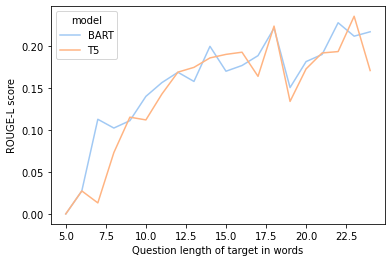

In [68]:
fig = sns.lineplot(data=ddf, x='question_length', y='rouge_scores', hue='model', palette='pastel');
fig.set(xlabel='Question length of target in words', ylabel='ROUGE-L score')
fig.figure.savefig('graphqlensrouge.png', format='png', dpi=1200)

In [70]:
penguins = sns.load_dataset("penguins")

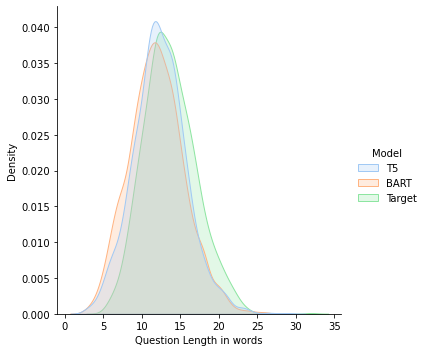

In [94]:
bartlens = [len(e.split()) for e in bartWQpreds]
t5lens = [len(e.split()) for e in t5WQpreds]

t5df = pd.DataFrame({'Question Length in words': t5lens, 'Model': 'T5'})
bartdf = pd.DataFrame({'Question Length in words': bartlens, 'Model': 'BART'})
tgtdf = pd.DataFrame({'Question Length in words': tgtlens, 'Model': 'Target'})

fulldf = t5df.append(bartdf).append(tgtdf)
sns.displot(fulldf, x="Question Length in words", hue="Model", kind='kde', fill=True, palette='pastel');